Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [ ]:
df = pd.read_csv('data_car.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


To check the columns present in dataset, the code will be

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

Inorder to check the number of rows and columns in the dataset, code will be

In [ ]:
print('The data shape is: ', (df.shape))

The data shape is:  (11914, 16)


Below code gives the full information about columns in a dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 715'

In [ ]:
df.drop_duplicates(inplace=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Rechecking the duplicate value

In [ ]:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 0'

No of rows present after duplicates removal, the code will be:

In [ ]:
print('Shape of the Data after duplicates removal: ', (df.shape))

Shape of the Data after duplicates removal:  (11199, 16)


In [ ]:
df=df.reset_index(drop=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Number of Missing Values in our data set



,Variable,Missing Values
0,Make,0
1,Model,0
2,Year,0
3,Engine Fuel Type,3
4,Engine HP,69
5,Engine Cylinders,30
6,Transmission Type,0
7,Driven_Wheels,0
8,Number of Doors,6
9,Market Category,3376



 Percentage of Missing Values in our data set


,Count
Make,0.000000
Model,0.000000
Year,0.000000
Engine Fuel Type,0.026788
Engine HP,0.616126
Engine Cylinders,0.267881
Transmission Type,0.000000
Driven_Wheels,0.000000
Number of Doors,0.053576
Market Category,30.145549


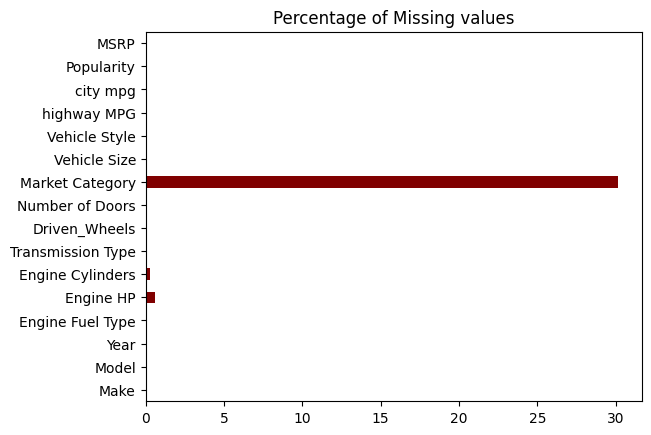

In [ ]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values");

Above tables and plot shows frequency and percentage of missing values in our data set.
> We have missing values in columns like Engine HP, Engine Fuel Type , No of Doors and Market Category.
> Variable market_category has the highest missing values and engine_fuel_type has the least missing values count.
> We will use mode to compute missing values in categorical columns and mean or median to compute missing values in numerical columns.
</ul> </div>

Missing Value Treatment

In [ ]:
#We will use Mode to fill up missing values in Categorical columns
df['Market Category'].fillna(df['Market Category'].mode()[0], inplace = True)
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace = True)
   

#We will use mean to fill up missing values in Numerical Continuous columns
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace = True)

#We will use median to fill up missing values in Ordinal Numerical Discrete columns
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace = True)
df['Number of Doors'].fillna(df['Number of Doors'].median(), inplace = True)

#Checking Missing Values after imputing
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,Make,0
1,Model,0
2,Year,0
3,Engine Fuel Type,0
4,Engine HP,0
5,Engine Cylinders,0
6,Transmission Type,0
7,Driven_Wheels,0
8,Number of Doors,0
9,Market Category,0


Data Description & Data Cleaning

Checking the summary of numerical columns

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.666845,3.454416,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.811049,1.794696,0.872804,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


*Summary checking of categorical column*

In [ ]:
df.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11199,11199,11199,11199,11199,11199
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6661,7932,4354,4451,4395,2843


Cleaning Strings in Columns Names - To get uniformity, "_" and "UPPERCASE" is being converted

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


List of available categorical columns

In [ ]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Cleaning Categorical Data

In [ ]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Code to check unique values in categorical column

In [ ]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print("Number of unique classes ",df[col].nunique())
    print('\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
Number of unique classes  48


model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-clas

Couldn't find any spelling errors, but there is a transmission type named "unknown" and have to remove it.

Removed the 'unknown'unsual category from Transmission type

In [ ]:
df.drop(df.loc[df['transmission_type']=='unknown'].index, inplace=True)
df.shape

(11187, 16)

In [ ]:
df.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11183,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11184,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11185,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Code to check negative value in numerical columns

In [ ]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
    df[df[i]<0]
    print("Records with Negative values in %s : " %i,df[df[i]<0])
    print('\n')

Records with Negative values in year :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in engine_hp :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in engine_cylinders :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in number_of_doors :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylin

Checking if columns have values as 0

In [ ]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
   df[df[i]==0]
   print("Records with 0 values in %s : " %i,df[df[i]==0])
   print('\n')

Records with 0 values in year :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with 0 values in engine_hp :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with 0 values in engine_cylinders :                 make                   model  year engine_fuel_type  \
520            fiat                    500e  2015         electric   
521            fiat                    500e  2016         electric   
522            fiat                    500e  2017         electric   
1642  mercedes-benz  b-class_electric_drive  2015         electric   
1643  mercedes-benz  b-class_electric_drive  2016 

Correlation between Variables

In [ ]:
df.corr().style.background_gradient("cubehelix")

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.335125,-0.034288,0.245649,0.244613,0.188023,0.084830,0.208842
engine_hp,0.335125,1.000000,0.772172,-0.129843,-0.359305,-0.350345,0.042029,0.658818
engine_cylinders,-0.034288,0.772172,1.000000,-0.149708,-0.596376,-0.562677,0.038482,0.538883
number_of_doors,0.245649,-0.129843,-0.149708,1.000000,0.114391,0.120469,-0.058326,-0.145564
highway_mpg,0.244613,-0.359305,-0.596376,0.114391,1.000000,0.886288,-0.017423,-0.167008
city_mpg,0.188023,-0.350345,-0.562677,0.120469,0.886288,1.000000,-0.000829,-0.162673
popularity,0.084830,0.042029,0.038482,-0.058326,-0.017423,-0.000829,1.000000,-0.048849
msrp,0.208842,0.658818,0.538883,-0.145564,-0.167008,-0.162673,-0.048849,1.000000


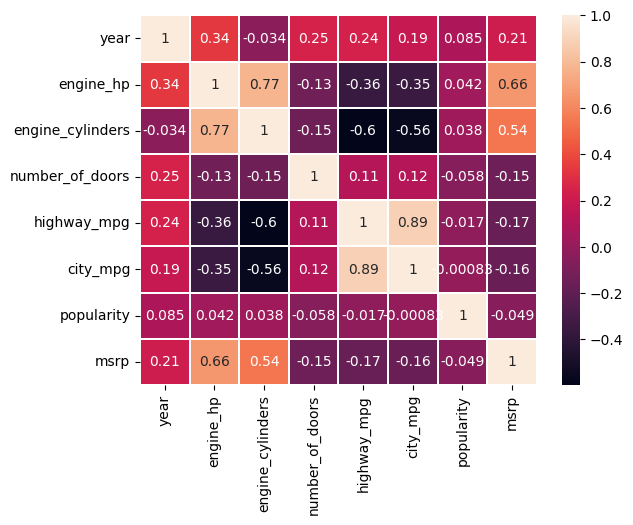

In [ ]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

Distribution and relationship of Numerical Variables with dependent variable



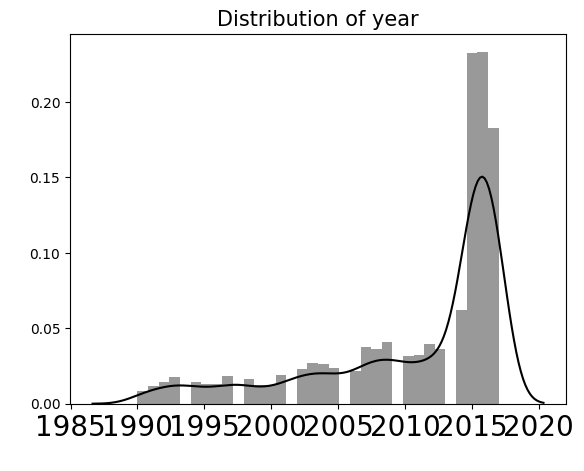

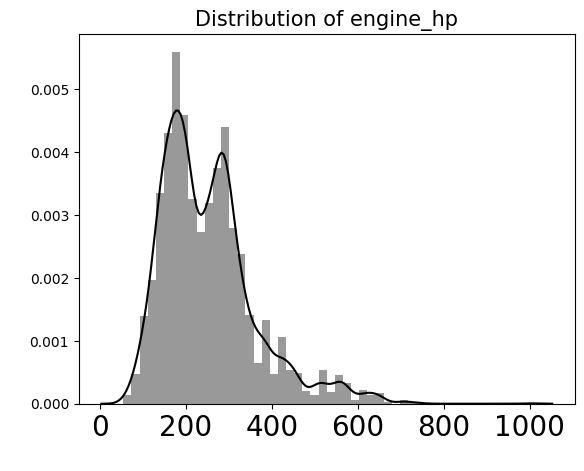

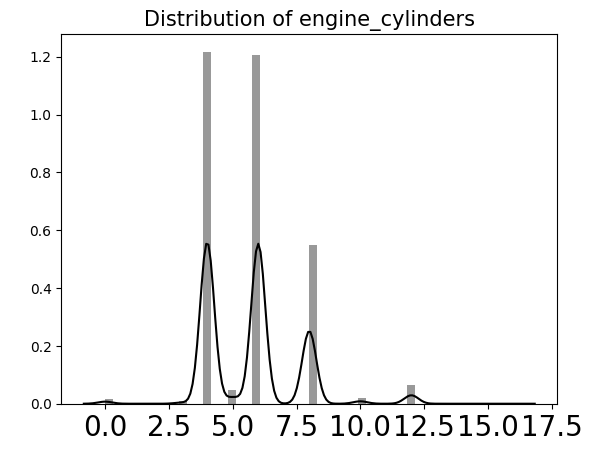

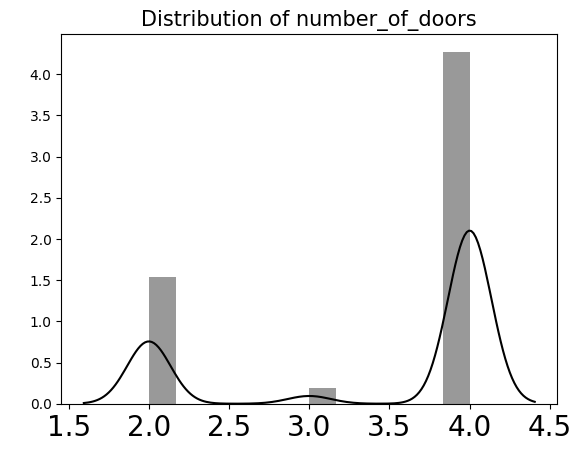

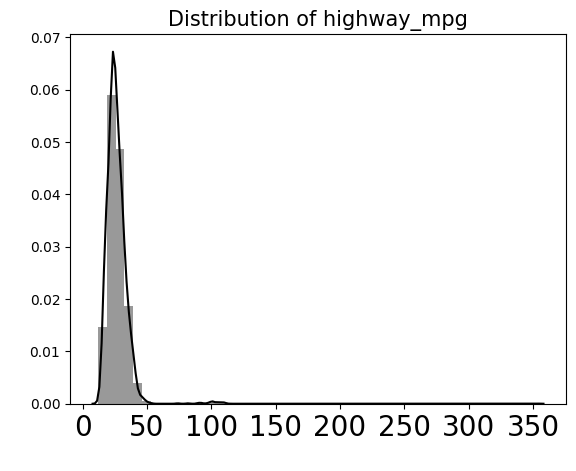

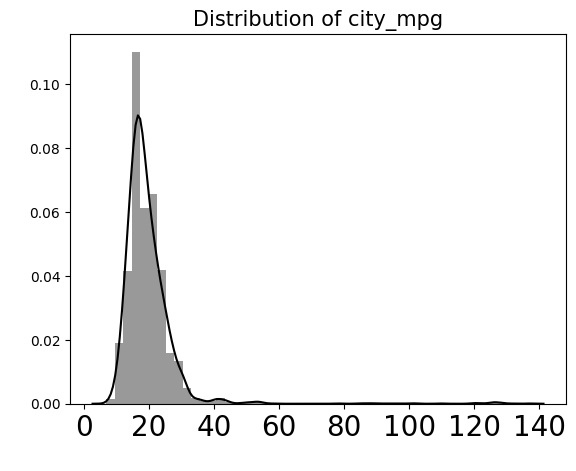

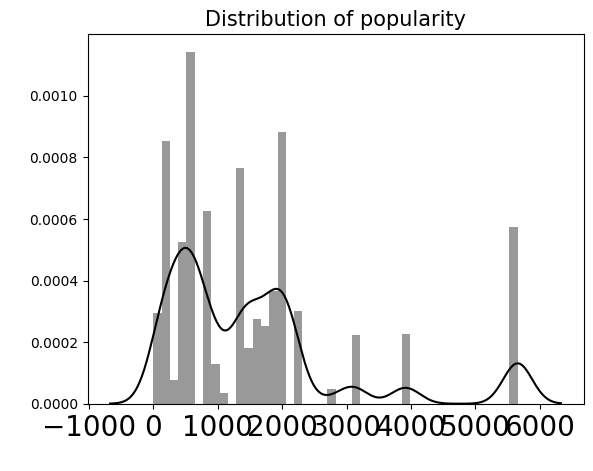

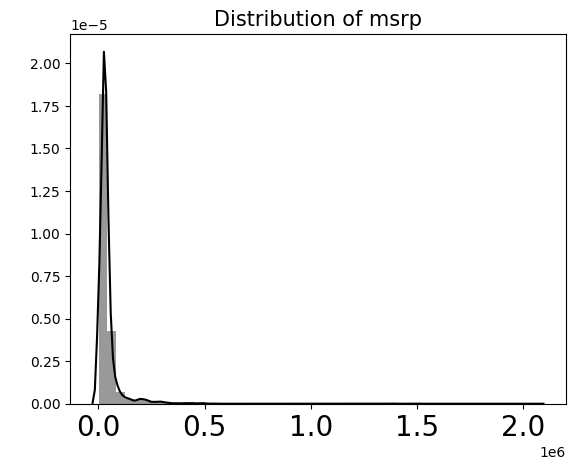

In [ ]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
   
    ax = sns.distplot(df[i], color = 'black')
    plt.title("Distribution of %s" %i, fontsize = 15)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 20)
    plt.show();
    print('\n')

> Numerical column distribution shows that some variables has skewed data: msrp, highway_mpg, year. Outlier removal or Log transformation of data may be useful before using the data for prediction.

>There are certain numerical variables which are ordinal in nature e.g. number_of_doors and engine_cylinders. They can be converted into categorical columns and then transformed for the prediction by using One Hot Encoding etc.

>Variable popularity shows multimodal distribution.
</ul> </div>

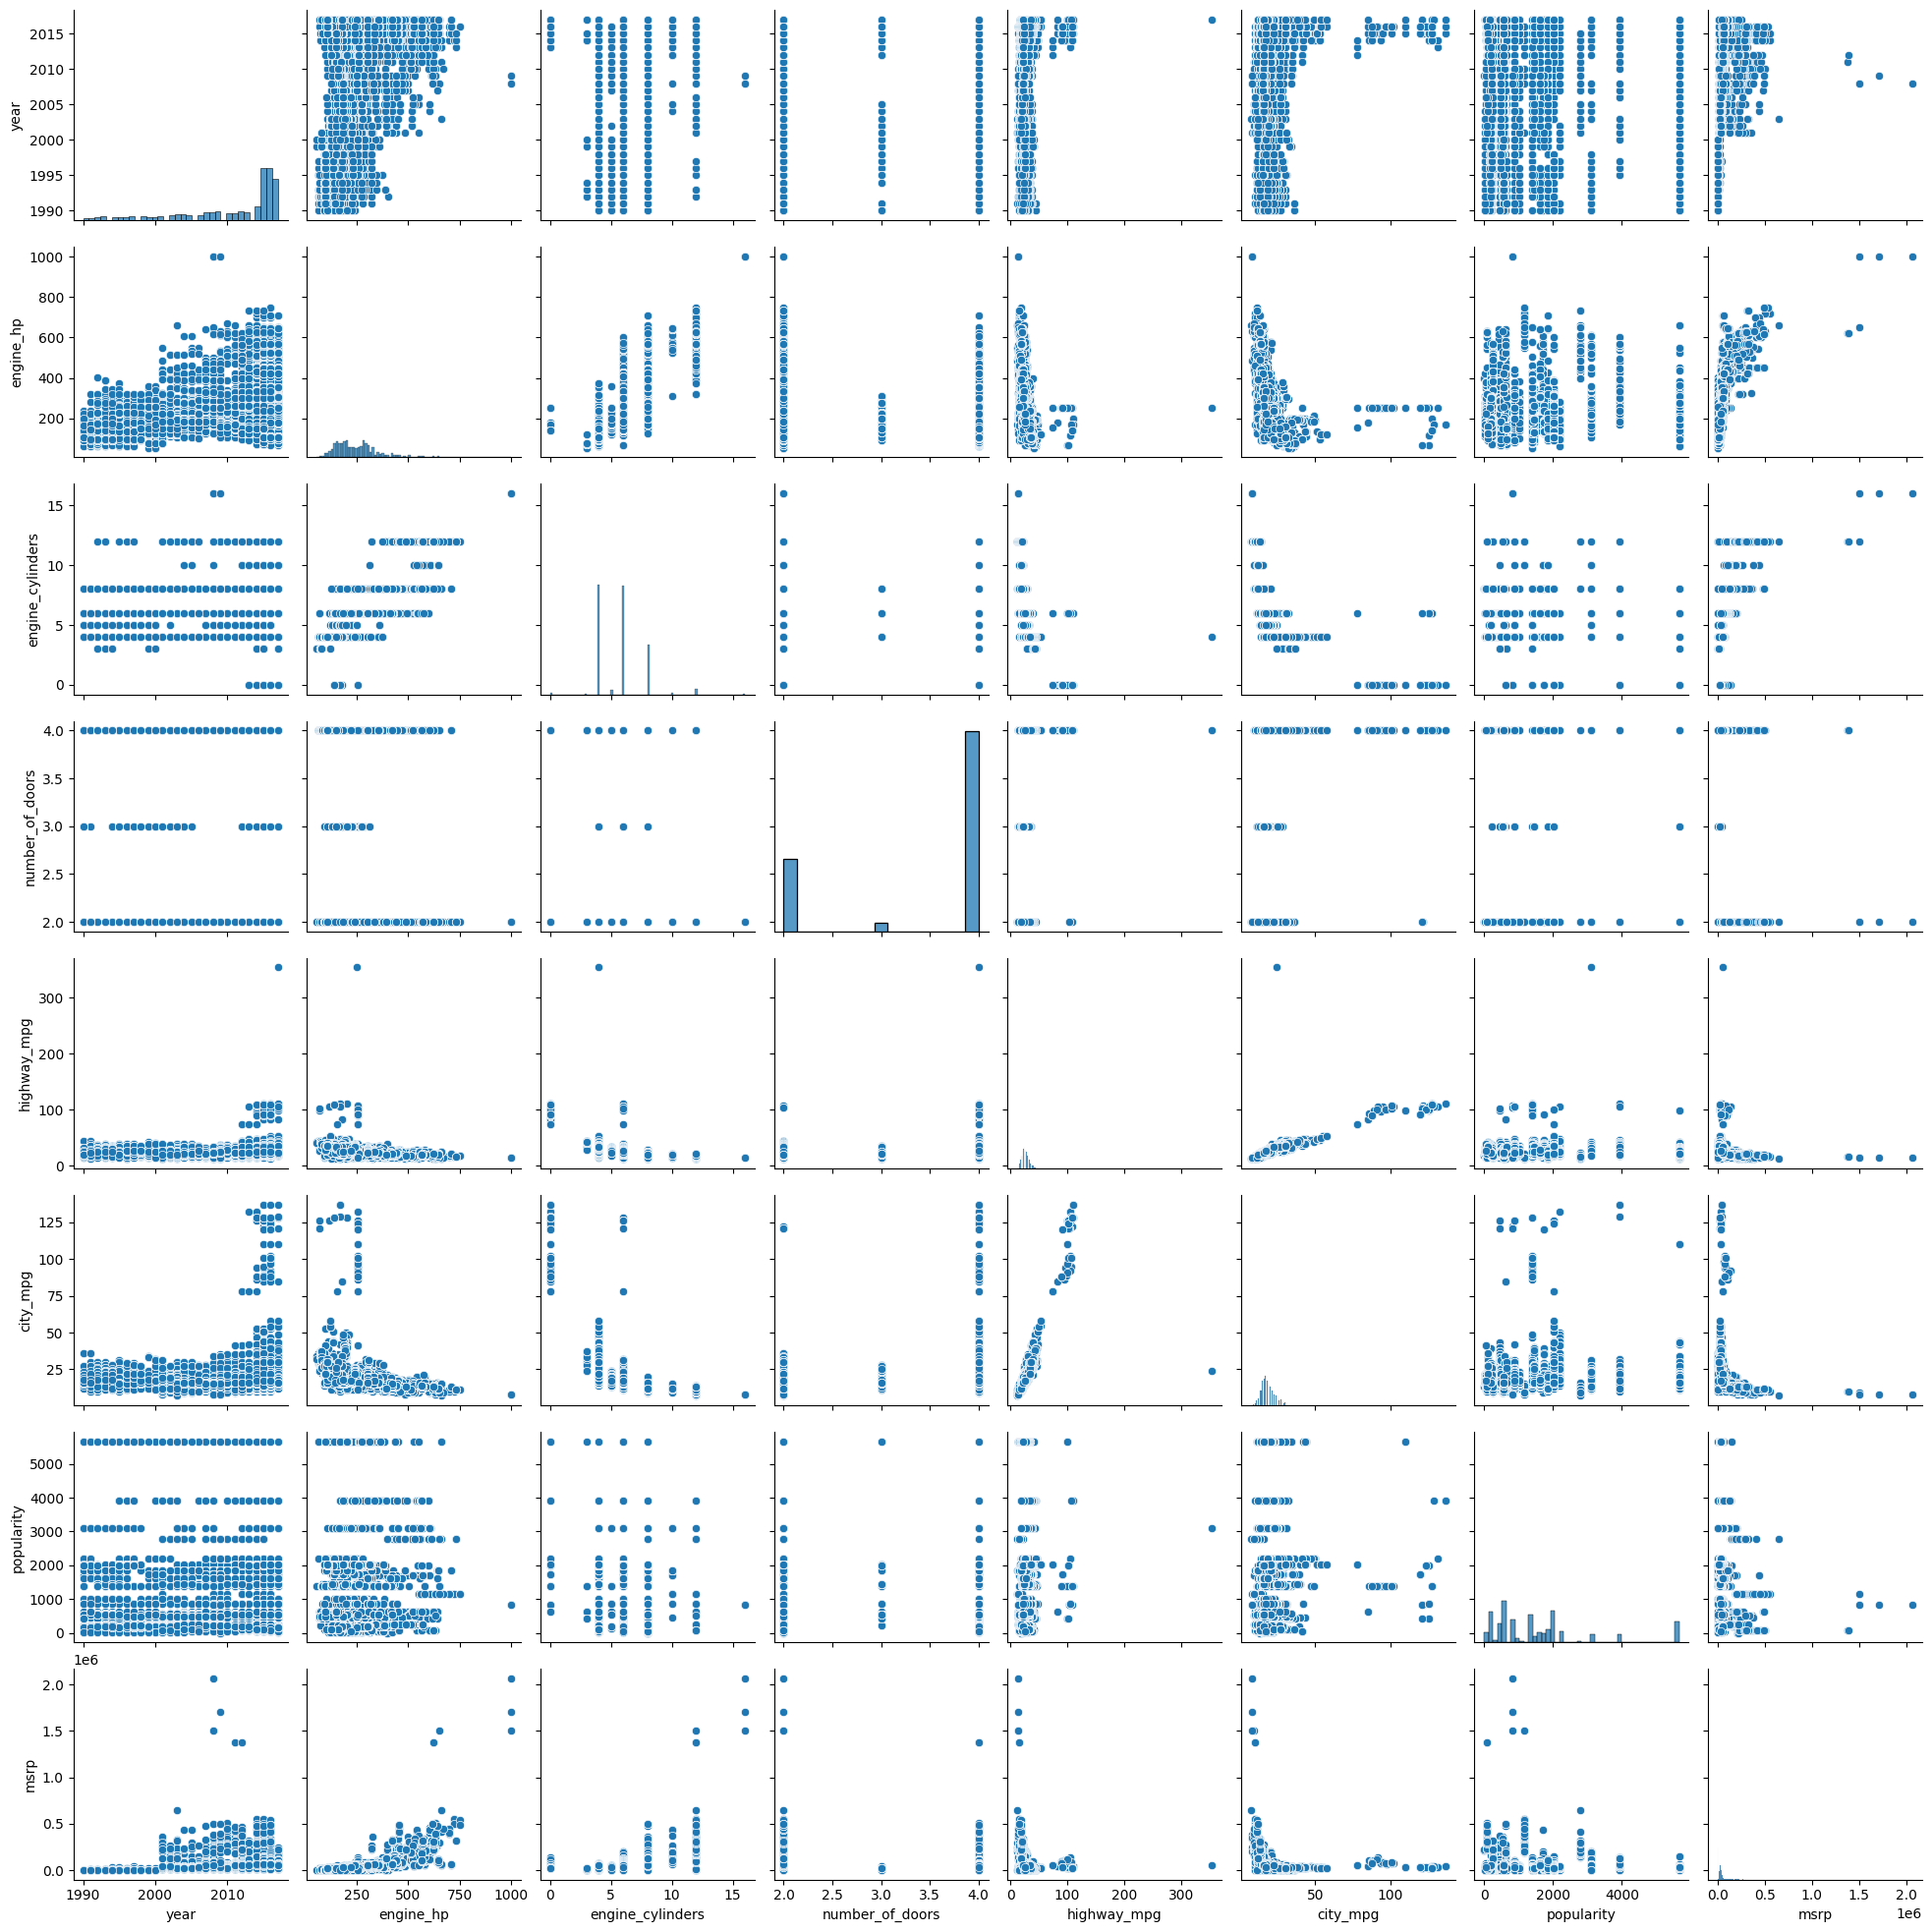

In [ ]:
sns.pairplot(df)

Checking Relation between all categorical variables and dependent variables (msrp)



In [ ]:
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='msrp', ascending = False)).index
    return orders

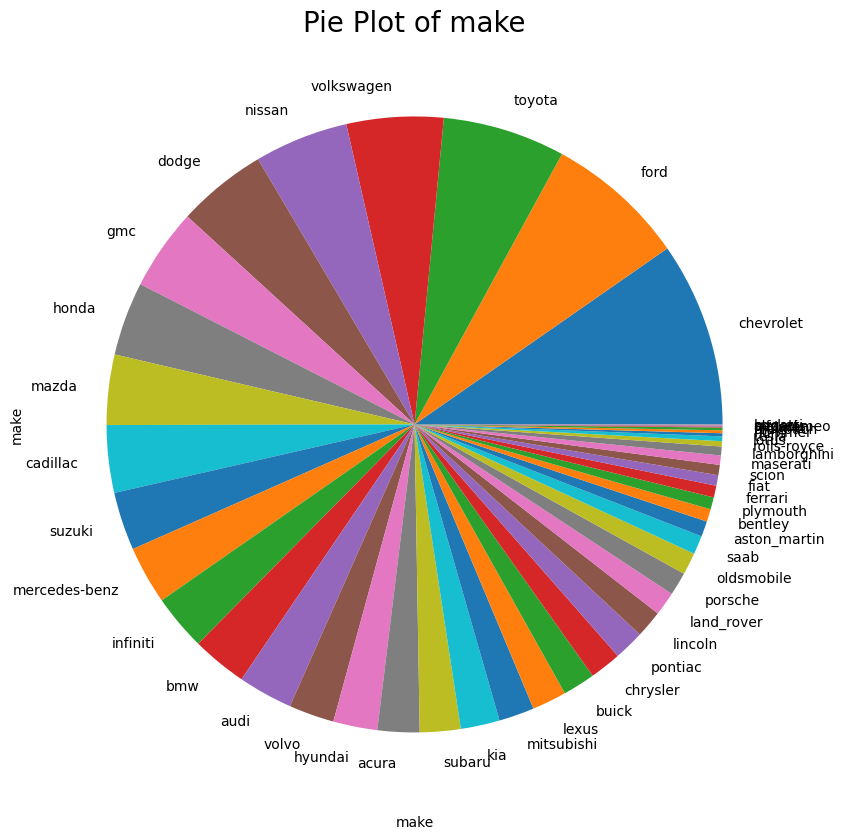

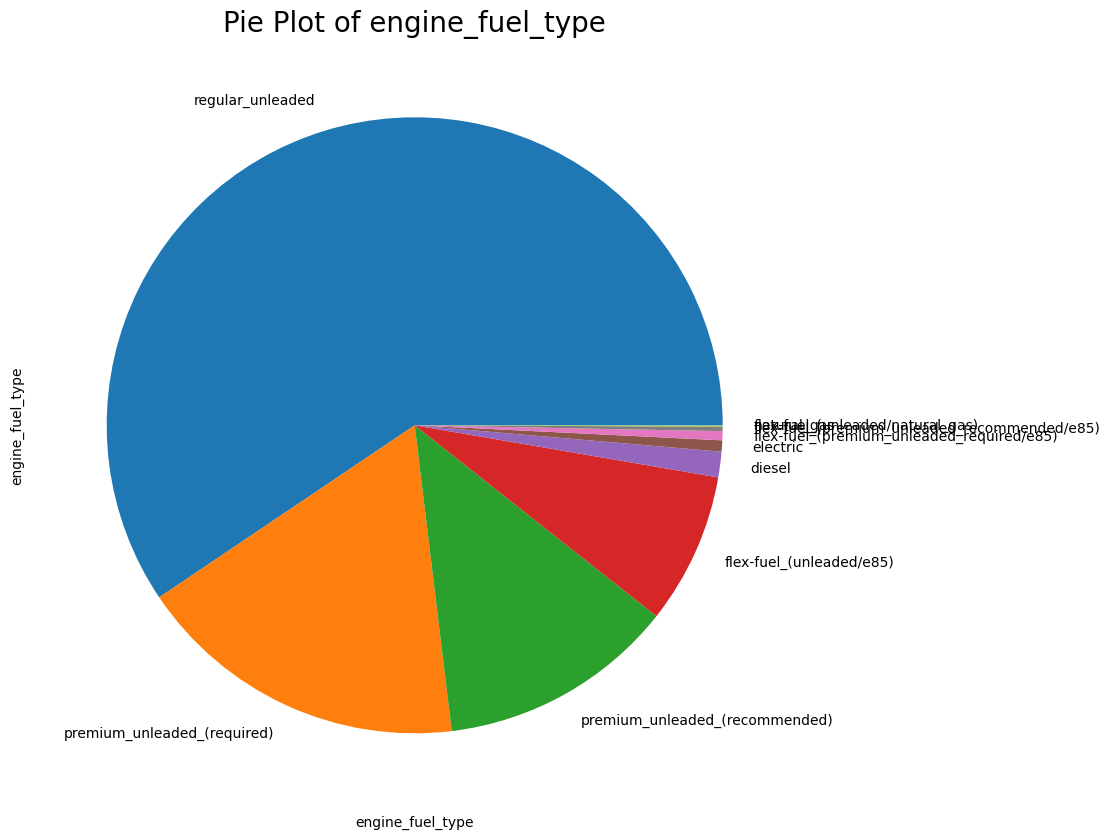

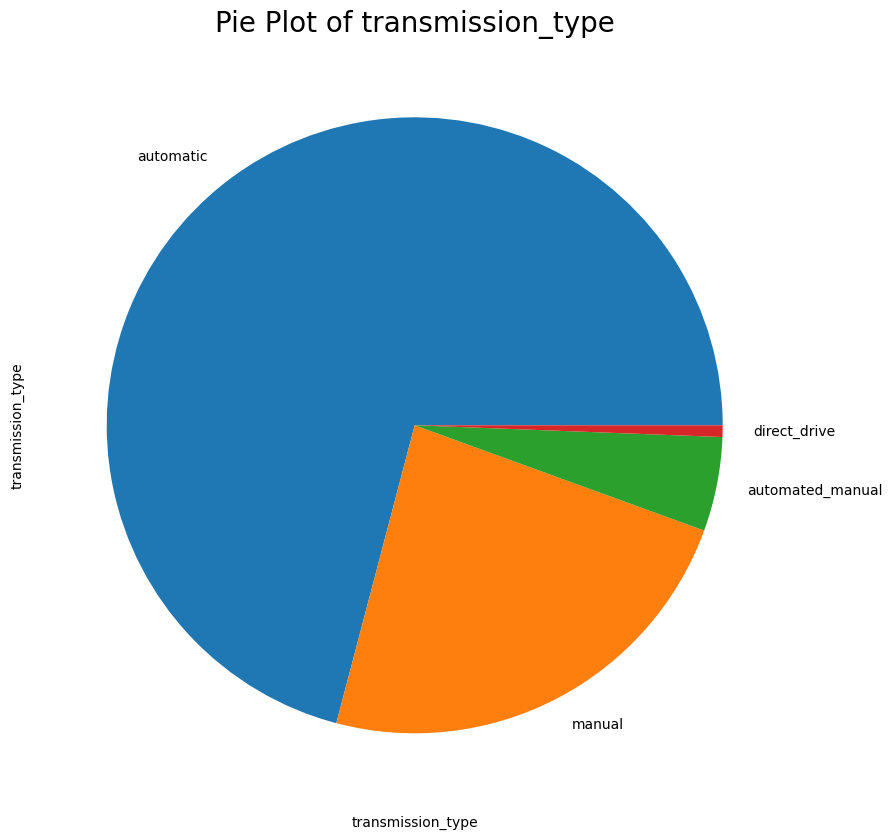

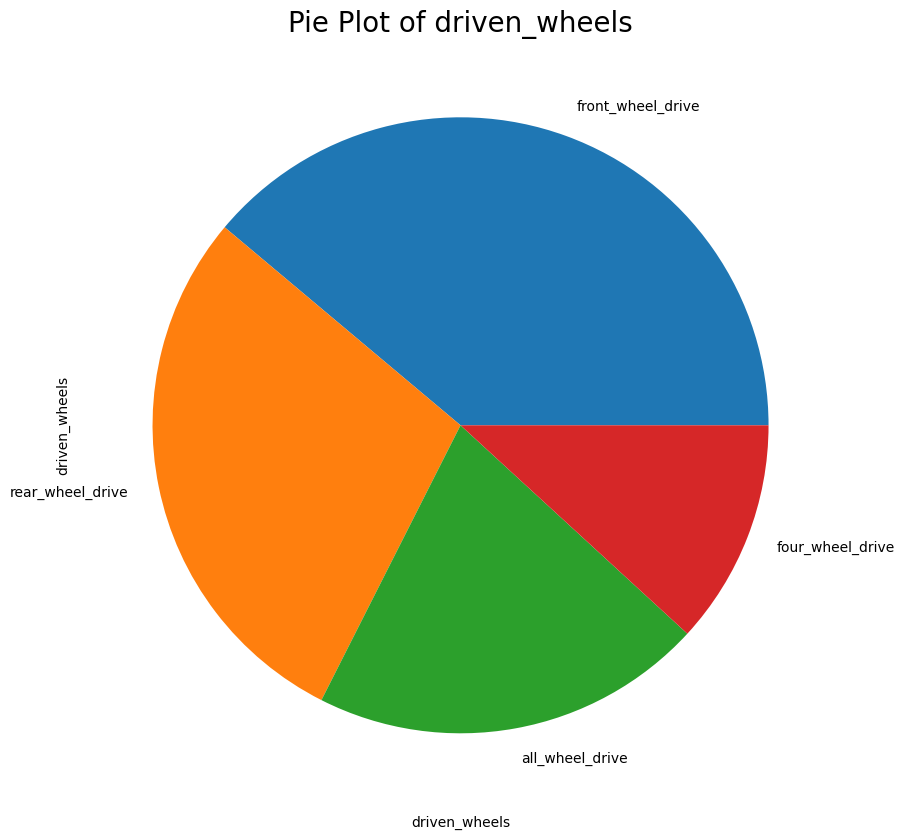

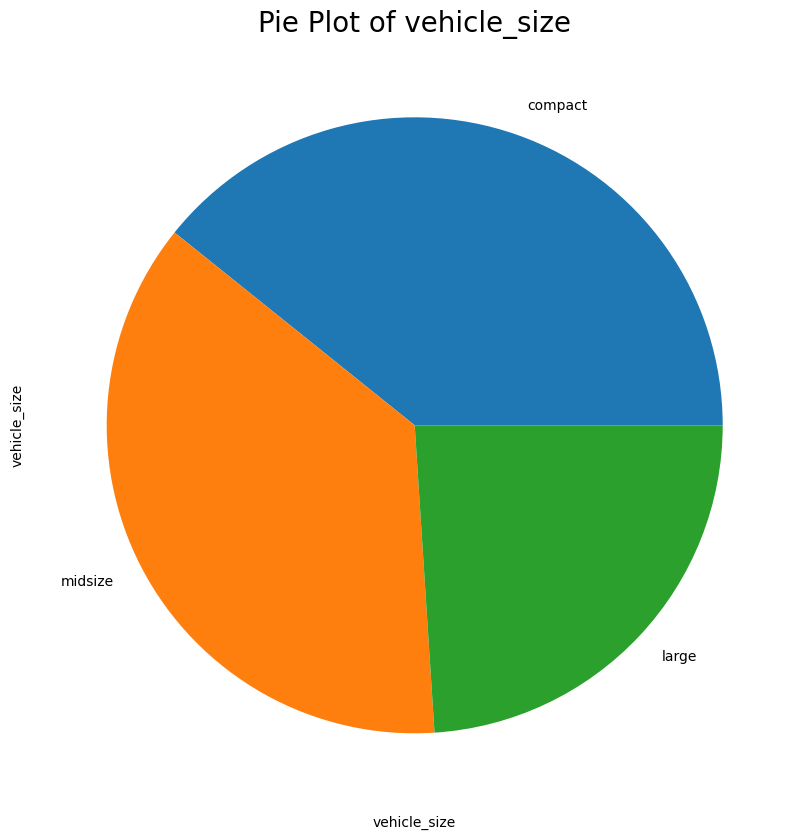

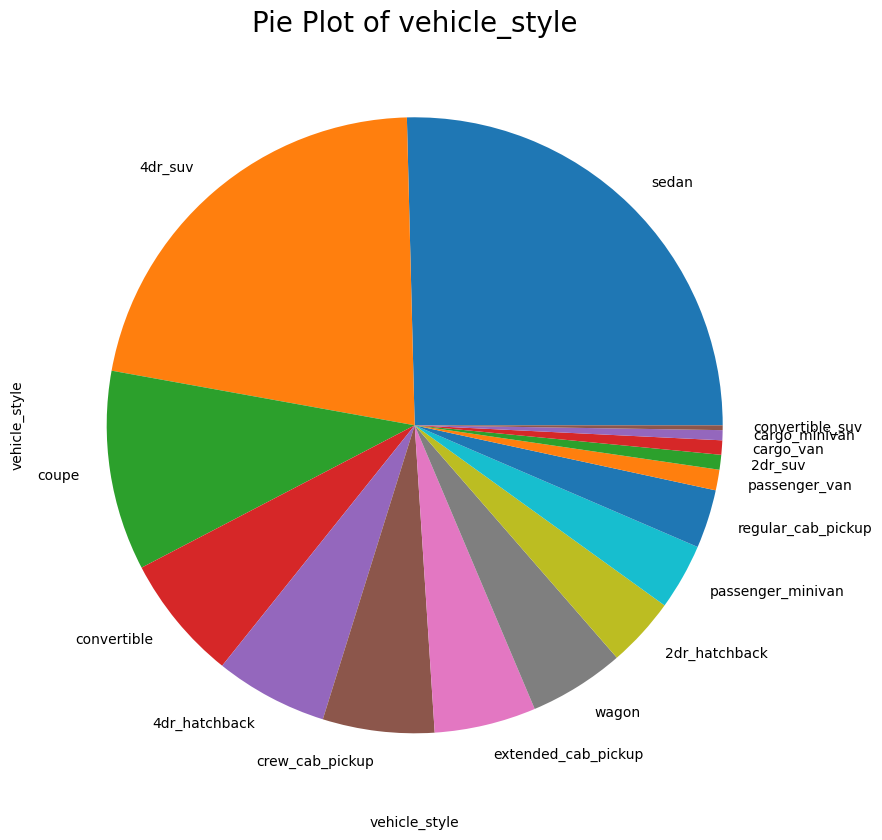

In [ ]:
#Looping over categorical variables to check the Price over different Groups
for i in categorical:
    if df[i].nunique() < 70:
        f,ax=plt.subplots(figsize=(20,10))
        df[i].value_counts().plot(kind='pie')
        plt.title("Pie Plot of %s" %i, fontsize = 20)
        plt.xticks(fontsize = 12)
        plt.xlabel("%s"%i)
        #plt.ylabel("Car Price")
        plt.xticks(fontsize = 15, rotation = 90)
        plt.show();
        print('\n')

<Axes: xlabel='transmission_type', ylabel='msrp'>

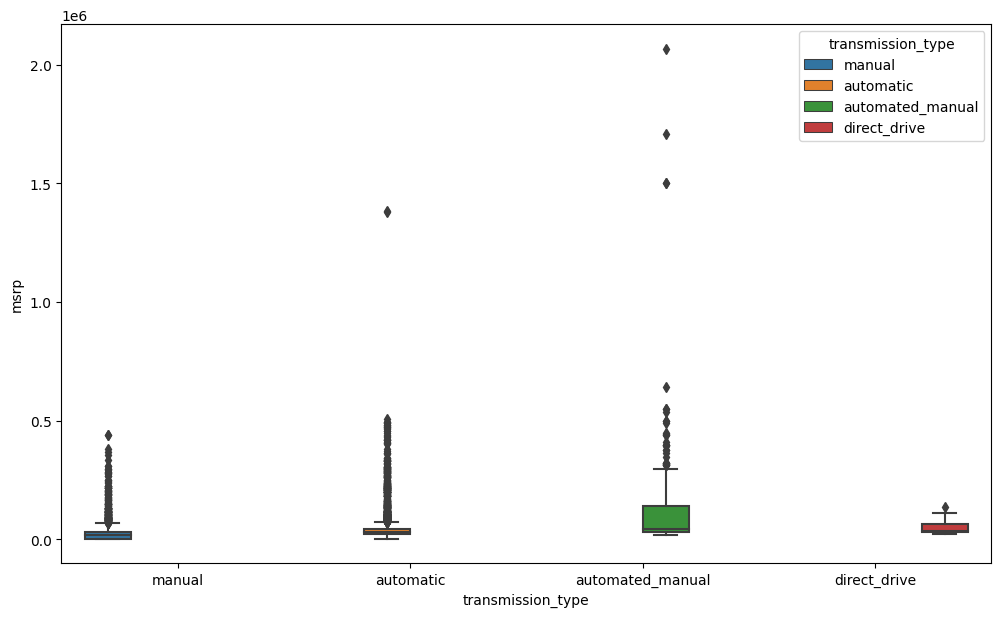

In [ ]:
f,ax=plt.subplots(figsize=(12,7))
sns.boxplot(x=df['transmission_type'],y=df['msrp'],hue=df['transmission_type'])

In [ ]:
counts=df['make'].value_counts()*100/sum(df['make'].value_counts())

In [ ]:
popular_labels=counts.index[:10]

colors=['black',]*len(popular_labels)
colors[0]='yellow'

fig=go.Figure(data=[go.Bar(x=counts[:10],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented Car Brands in the Dataset',xaxis_title="Percentage",yaxis_title="Car Brand")

In [ ]:
prices = df[['make','msrp']].loc[(df['make'].isin(popular_labels))].groupby('make').mean()
print(prices)
#calculating the average price of top 10 brands represented in the dataset

                    msrp
make                    
cadillac    56368.265152
chevrolet   29074.725762
dodge       24900.335227
ford        28511.307879
gmc         32695.742678
honda       26655.147806
mazda       20416.623786
nissan      28921.152450
toyota      28846.560501
volkswagen  28978.522887


In [ ]:
display_p=df[['make','year','msrp']].loc[(df['make'].isin(popular_labels))]

fig=px.box(display_p,x="make",y="msrp")
fig.update_layout(title_text='Average Price over 10 most represented Car Brands',xaxis_title="Make",yaxis_title="Average Price")

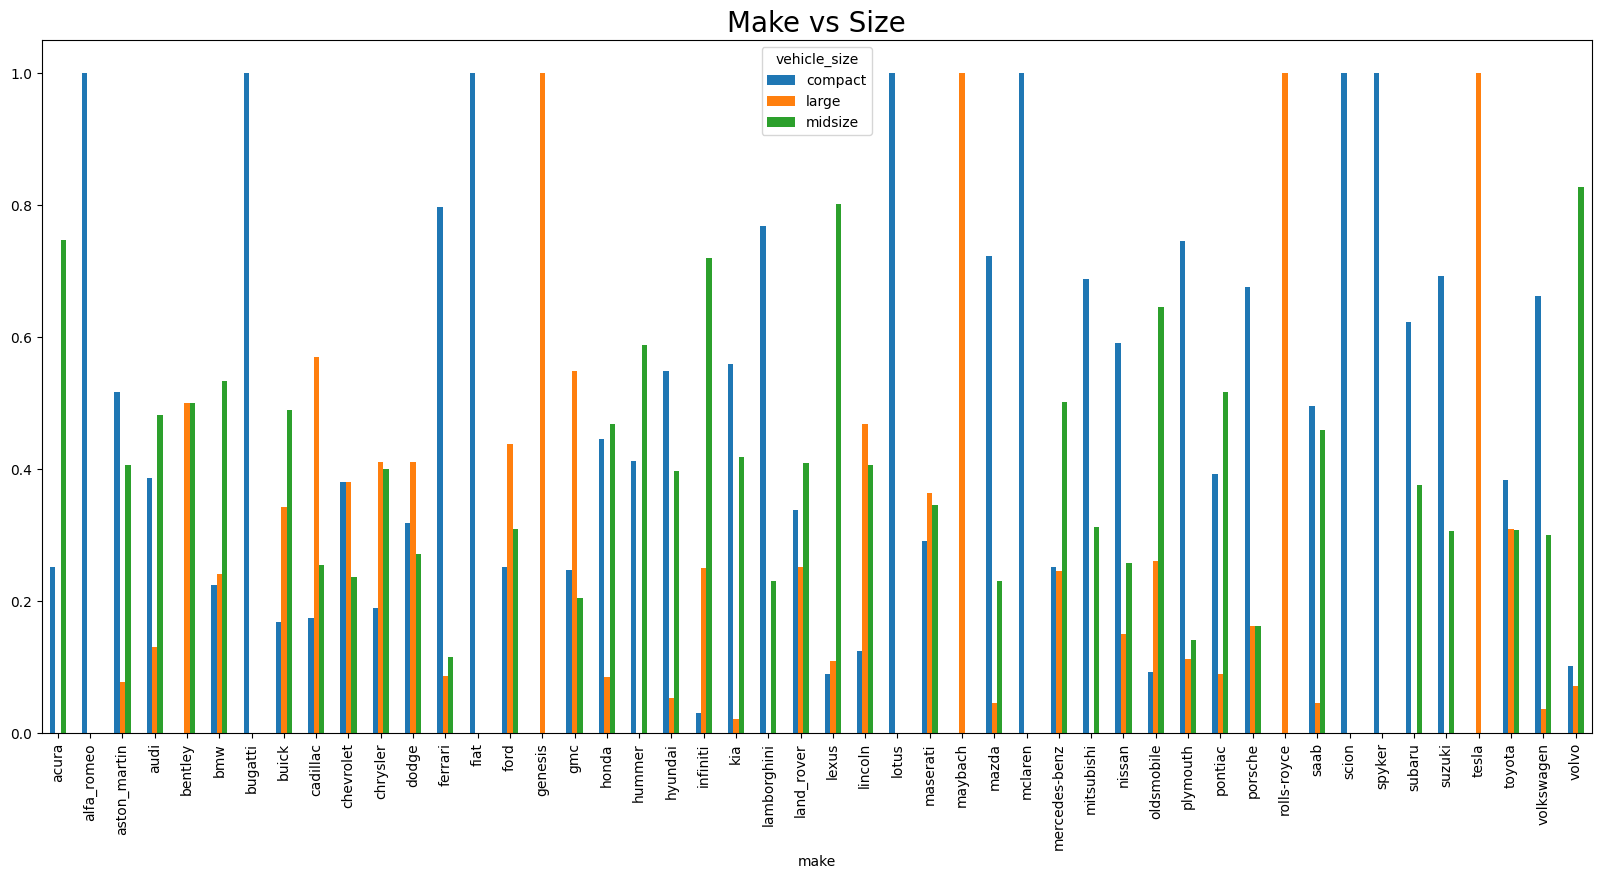

In [ ]:
plt.rcParams['figure.figsize'] = (20,9)
x = pd.crosstab(df['make'],df['vehicle_size'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Make vs Size',fontweight = 30,fontsize = 20)
plt.show()

Outlier Analysis

In [ ]:
#Checking outliers in columns
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [ ]:
def outlierDetection(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [ ]:
lr,ur = outlierDetection(df.year)
lr,ur

(1993.5, 2029.5)

In [ ]:
lr,ur=outlierDetection(df.year)
df.drop(df.index[(df.year > ur)],inplace=True)
df.drop(df.index[(df.year < lr)],inplace=True)

<Axes: >

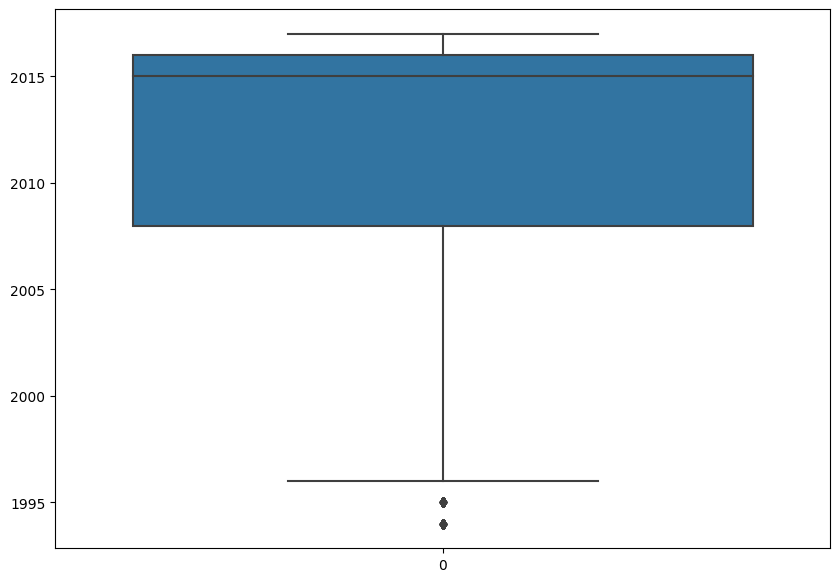

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.year)

In [ ]:
lr,ur = outlierDetection(df.year)
lr,ur

(1996.0, 2028.0)

In [ ]:
lr,ur=outlierDetection(df.year)
df.drop(df.index[(df.year > ur)],inplace=True)
df.drop(df.index[(df.year < lr)],inplace=True)

<Axes: >

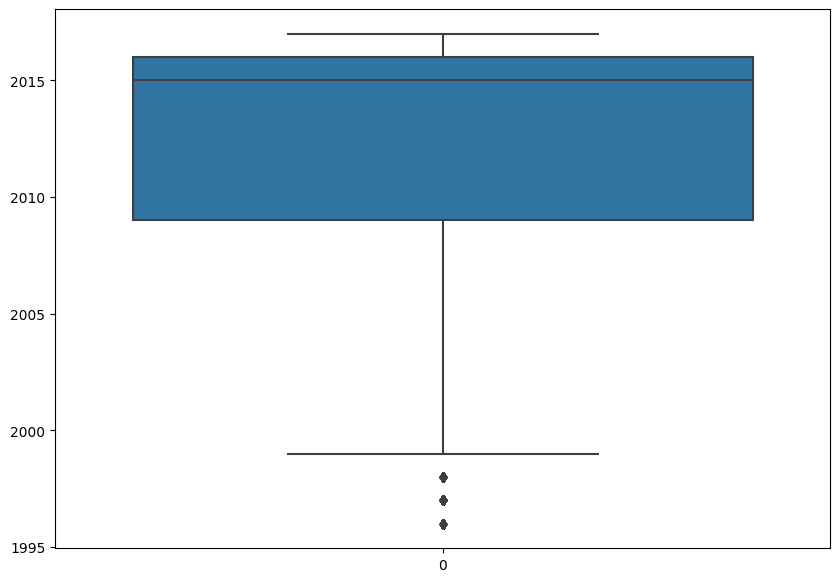

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.year)

In [ ]:
lr,ur = outlierDetection(df.year)
lr,ur

(1998.5, 2026.5)

In [ ]:
lr,ur=outlierDetection(df.year)
df.drop(df.index[(df.year > ur)],inplace=True)
df.drop(df.index[(df.year < lr)],inplace=True)

<Axes: >

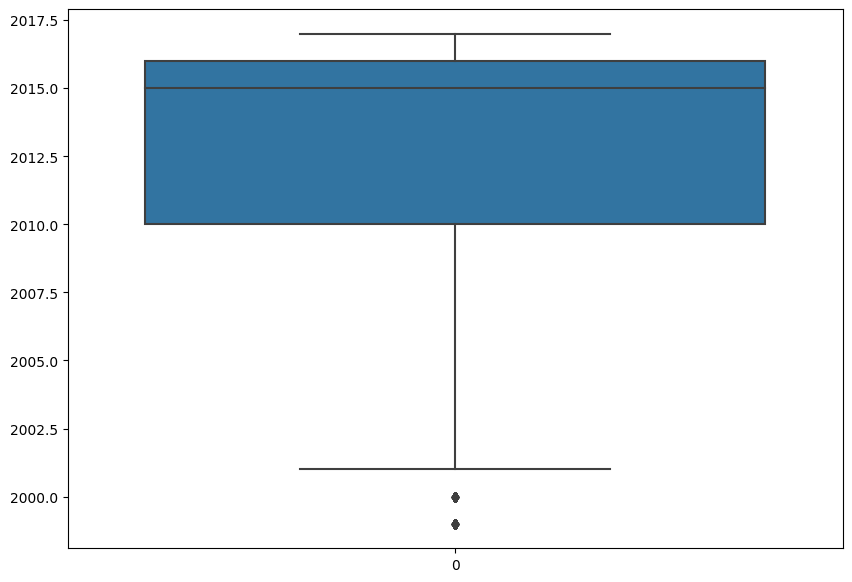

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.year)

In [ ]:
lr,ur = outlierDetection(df.year)
lr,ur

(2001.0, 2025.0)

In [ ]:
lr,ur=outlierDetection(df.year)
df.drop(df.index[(df.year > ur)],inplace=True)
df.drop(df.index[(df.year < lr)],inplace=True)

<Axes: >

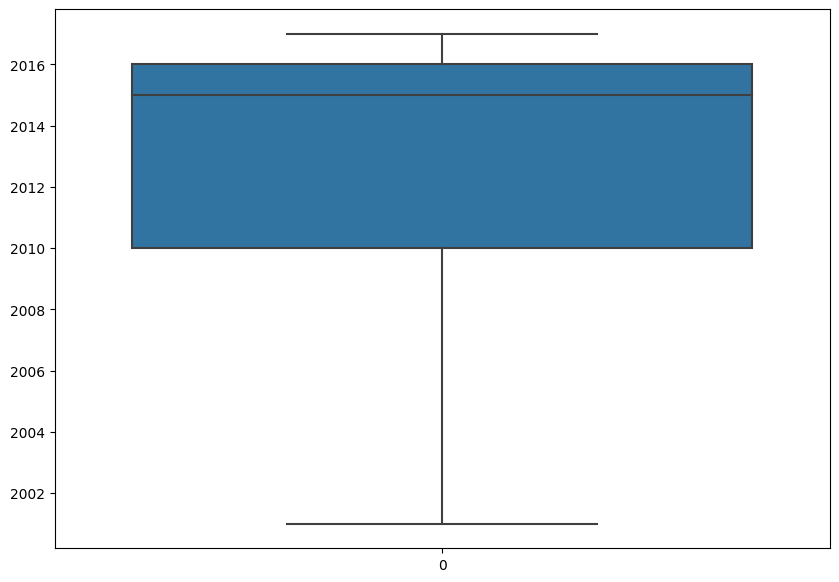

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.year)

Outlier Removal from HP Engine

<Axes: >

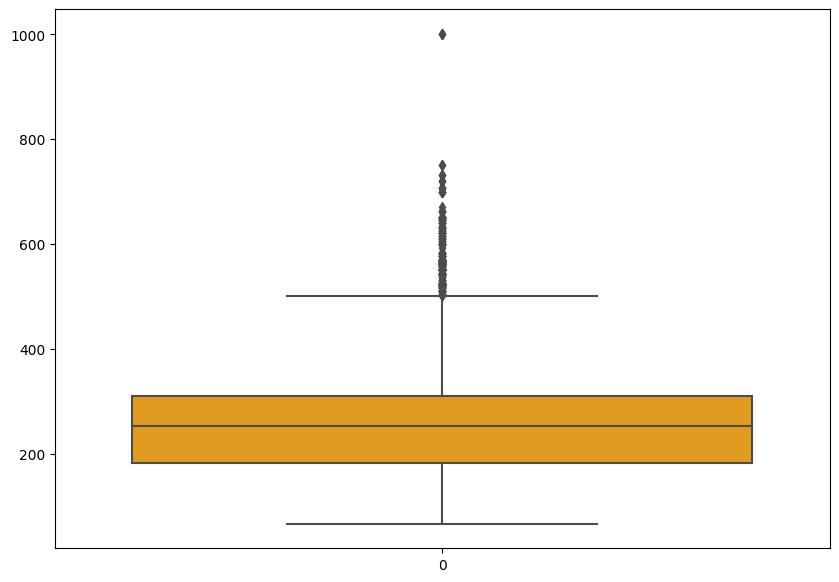

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.engine_hp,color='orange')

In [ ]:
lr,ur = outlierDetection(df.engine_hp)
lr,ur

(-10.0, 502.0)

In [ ]:
lr,ur=outlierDetection(df.engine_hp)
df.drop(df.index[(df.engine_hp > ur)],inplace=True)
df.drop(df.index[(df.engine_hp < lr)],inplace=True)

<Axes: >

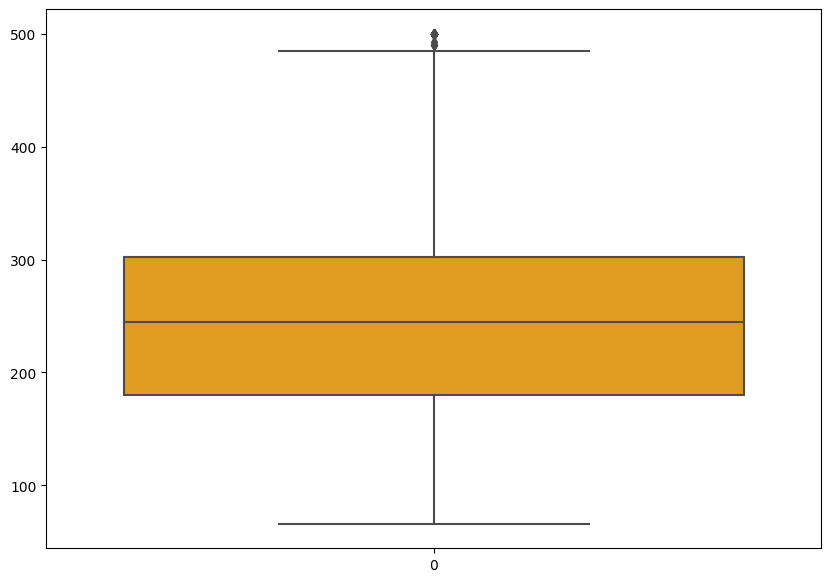

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.engine_hp,color='orange')

In [ ]:
lr,ur = outlierDetection(df.engine_hp)
lr,ur

(-3.0, 485.0)

In [ ]:
lr,ur=outlierDetection(df.engine_hp)
df.drop(df.index[(df.engine_hp > ur)],inplace=True)
df.drop(df.index[(df.engine_hp < lr)],inplace=True)

<Axes: >

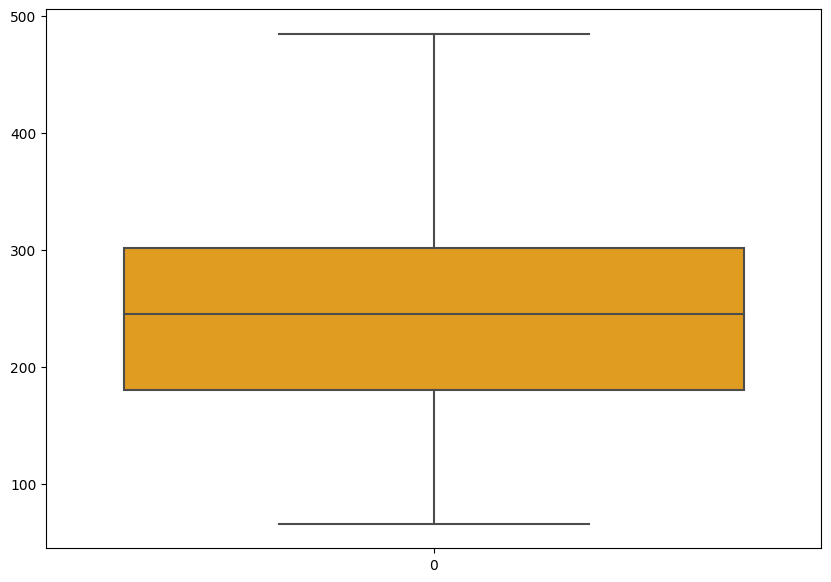

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.engine_hp,color='orange')

Outlier Removal in Engine Cylinders

<Axes: >

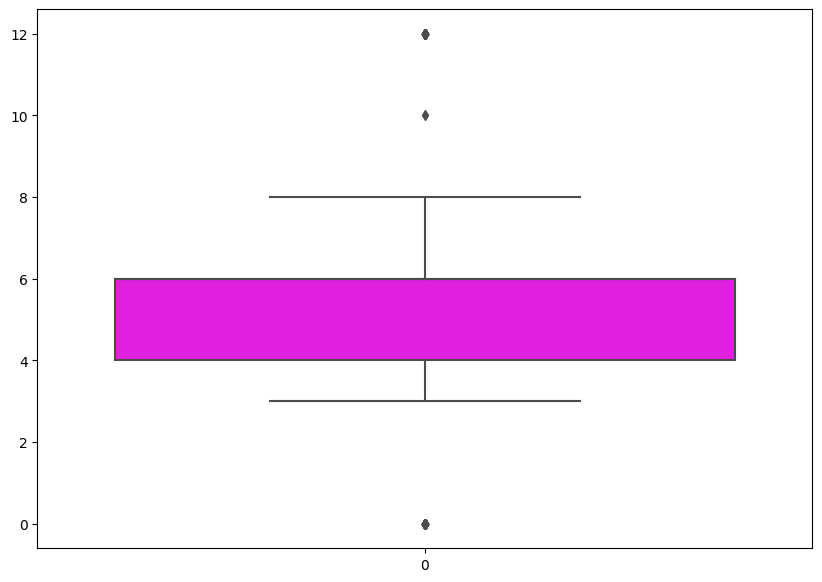

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.engine_cylinders,color='magenta')

In [ ]:
lr,ur = outlierDetection(df.engine_cylinders)
lr,ur

(1.0, 9.0)

In [ ]:
lr,ur=outlierDetection(df.engine_cylinders)
df.drop(df.index[(df.engine_cylinders > ur)],inplace=True)
df.drop(df.index[(df.engine_cylinders < lr)],inplace=True)

<Axes: >

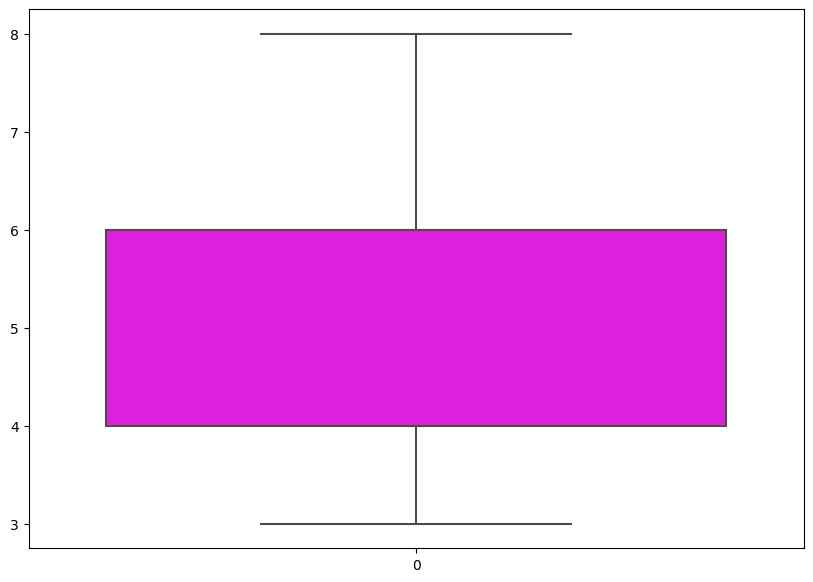

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.engine_cylinders,color='magenta')

Outlier Removal - Highway MPG

<Axes: >

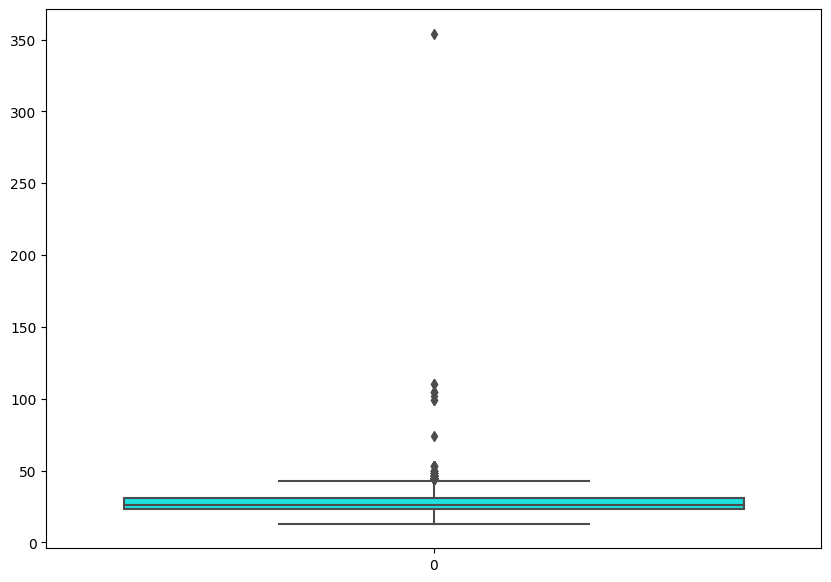

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.highway_mpg,color='cyan')

In [ ]:
lr,ur = outlierDetection(df.highway_mpg)
lr,ur

(11.0, 43.0)

In [ ]:
lr,ur=outlierDetection(df.highway_mpg)
df.drop(df.index[(df.highway_mpg > ur)],inplace=True)
df.drop(df.index[(df.highway_mpg < lr)],inplace=True)

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.highway_mpg,color='cyan')

Outlier Removal - City

<Axes: >

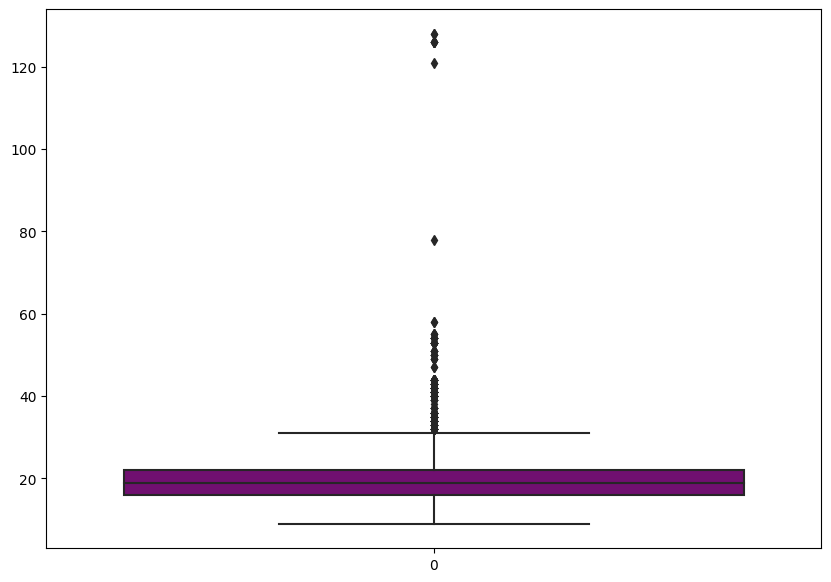

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.city_mpg,color='purple')

<Axes: >

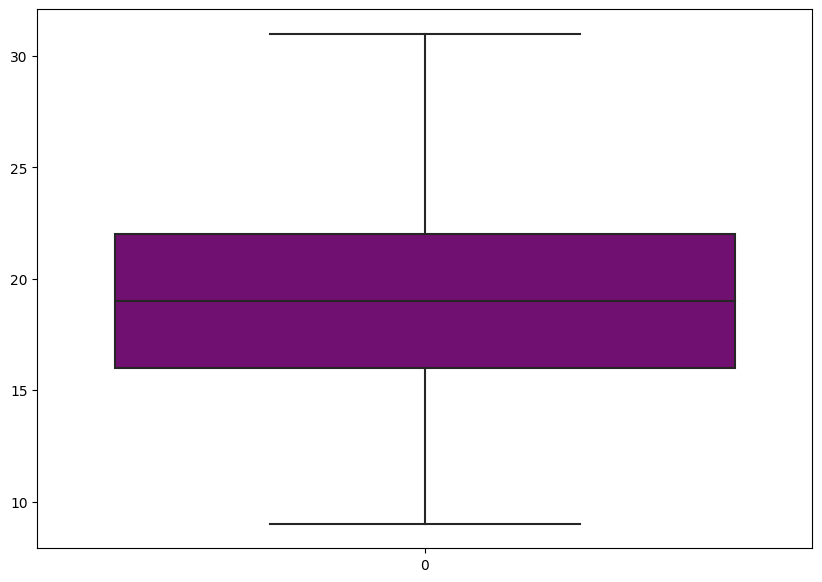

In [ ]:
lr,ur = outlierDetection(df.city_mpg)
lr,ur=outlierDetection(df.city_mpg)
df.drop(df.index[(df.city_mpg > ur)],inplace=True)
df.drop(df.index[(df.city_mpg < lr)],inplace=True)
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.city_mpg,color='purple')

Popularity - Outlier Removal

<Axes: >

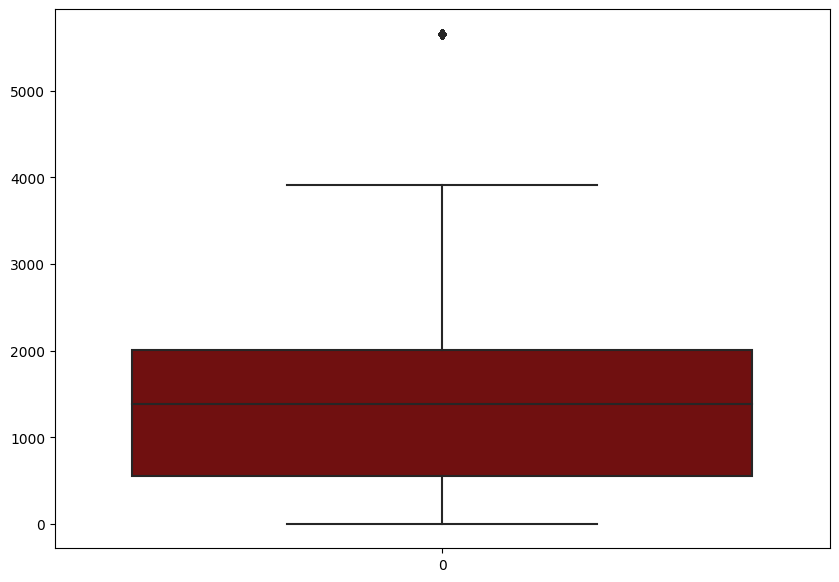

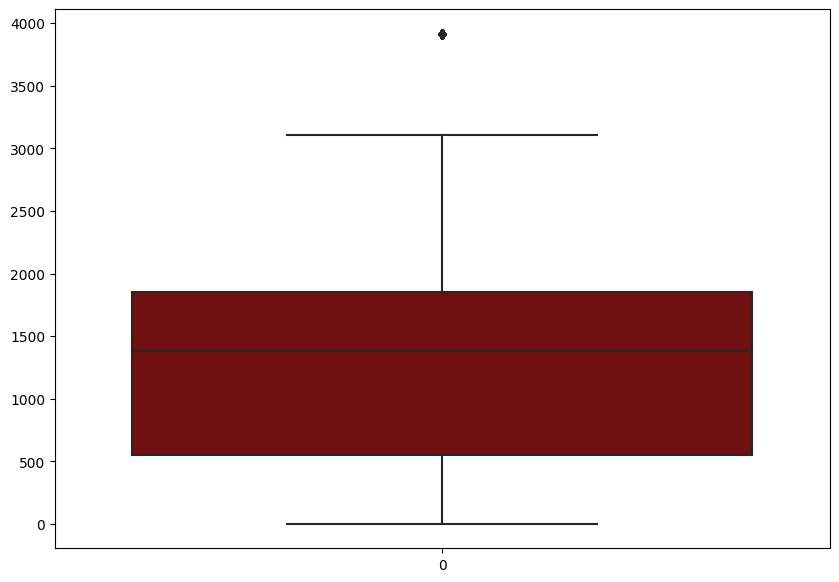

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.popularity,color='maroon')
lr,ur = outlierDetection(df.popularity)
lr,ur=outlierDetection(df.popularity)
df.drop(df.index[(df.popularity > ur)],inplace=True)
df.drop(df.index[(df.popularity < lr)],inplace=True)
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(df.popularity,color='maroon')

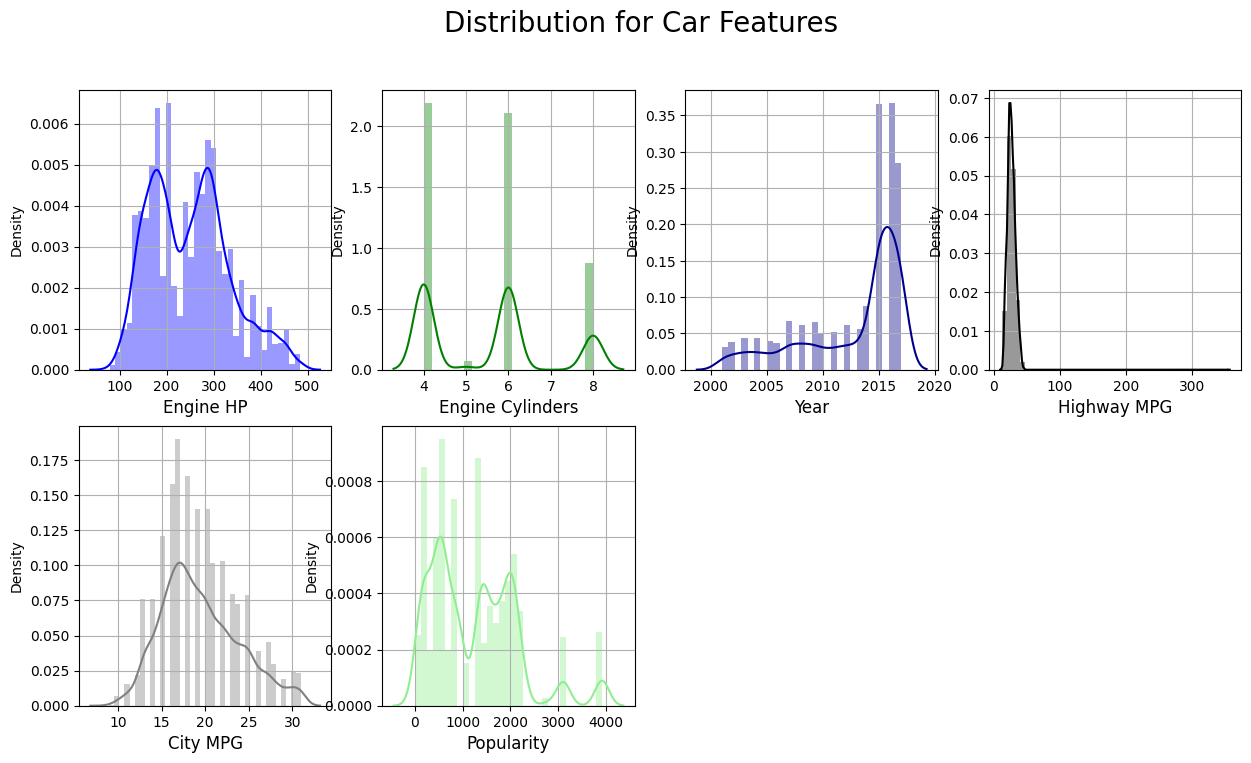

In [ ]:
#Distribution for Car Features
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df['engine_hp'],color = 'blue')
plt.xlabel('Engine HP',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['engine_cylinders'],color = 'green')
plt.xlabel('Engine Cylinders',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['year'],color = 'darkblue')
plt.xlabel('Year',fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['highway_mpg'],color = 'black')
plt.xlabel('Highway MPG',fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['city_mpg'],color = 'grey')
plt.xlabel('City MPG',fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['popularity'],color = 'lightgreen')
plt.xlabel('Popularity',fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Car Features', fontsize = 20)
plt.show()

One Hot Encoding of the Categorical Columns


In [ ]:
final=pd.get_dummies(df, columns=['transmission_type','driven_wheels','vehicle_size'])
final

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,number_of_doors,market_category,vehicle_style,highway_mpg,...,transmission_type_automated_manual,transmission_type_automatic,transmission_type_manual,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,vehicle_size_compact,vehicle_size_large,vehicle_size_midsize
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,2.0,"factory_tuner,luxury,high-performance",coupe,26,...,0,0,1,0,0,0,1,1,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,2.0,"luxury,performance",convertible,28,...,0,0,1,0,0,0,1,1,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,2.0,"luxury,high-performance",coupe,28,...,0,0,1,0,0,0,1,1,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,2.0,"luxury,performance",coupe,28,...,0,0,1,0,0,0,1,1,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,2.0,luxury,convertible,28,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11195,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11196,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11197,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1


<Axes: >

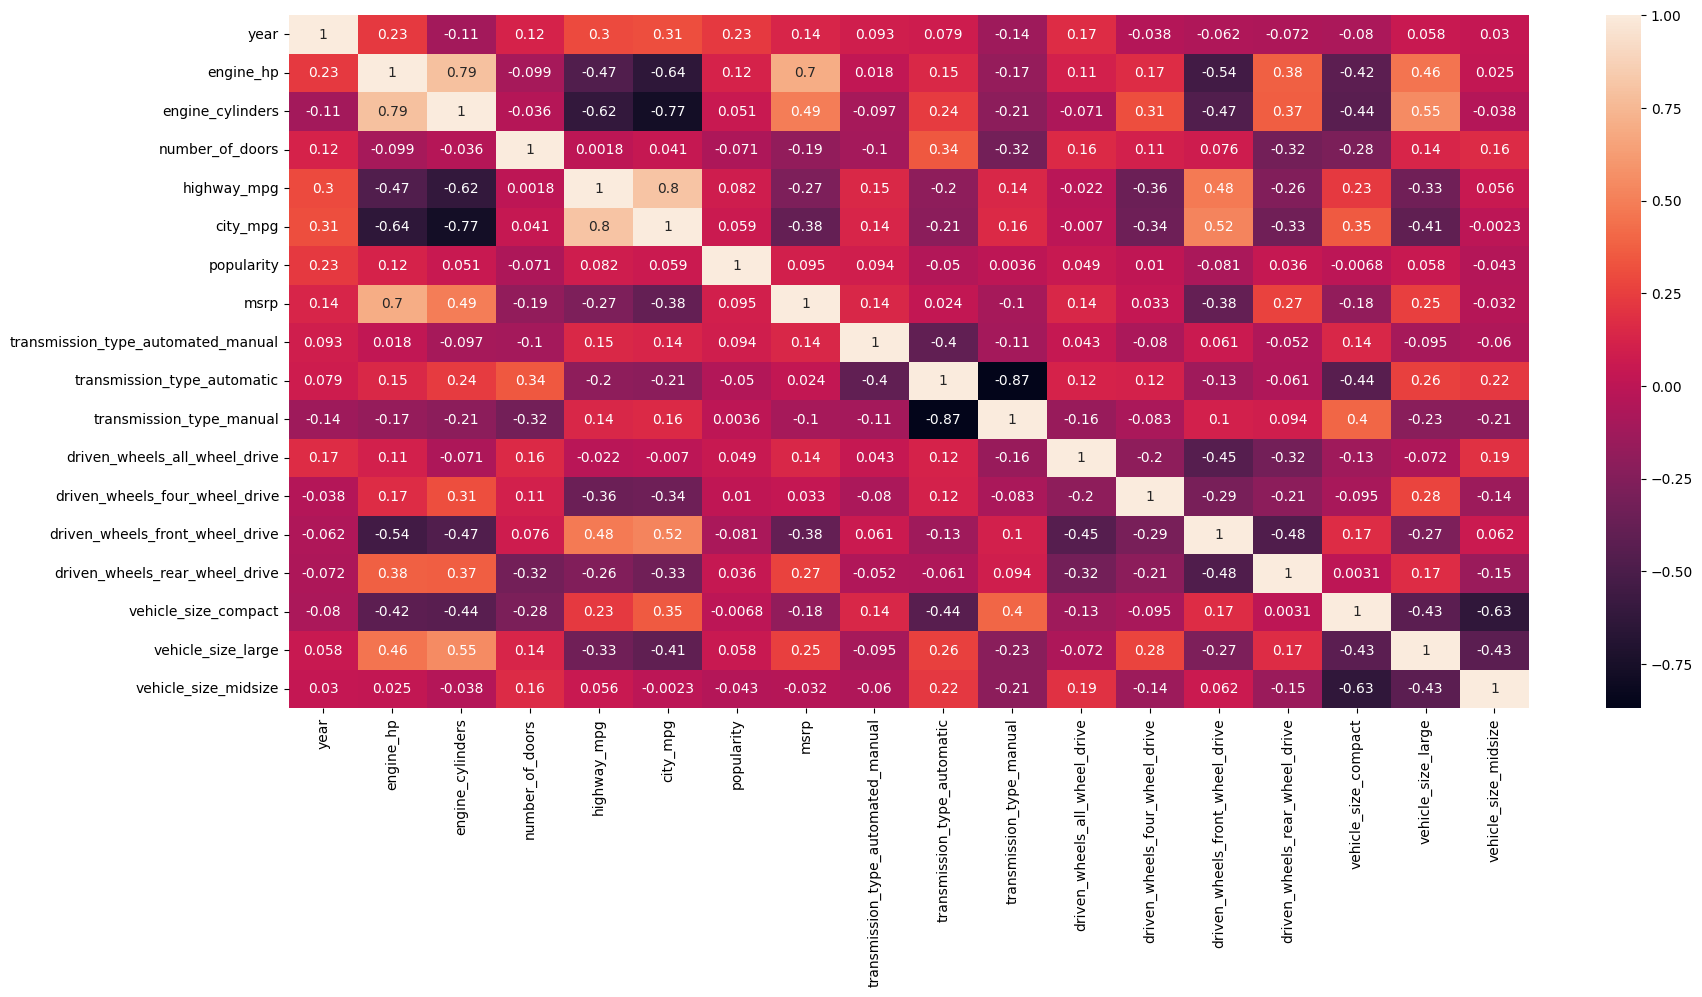

In [ ]:
sns.heatmap(final.corr(),annot=True)

> Engine_hp and Engine_cylinders have comparatively good relationship with msrp.

> There is a negative correlation between Automatic and Manual transmission type but we can see that they both don't affect the dependent variable (msrp)

> City and highway mpg have high correlation between then so we can remove one of them while predicting Car price

> Engine cylinders and highway mpg have negative correlation between them

Car Price Prediction

In [ ]:
# performing label encoding to the categorical columns
columns_to_convert=['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style','market_category']
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [ ]:
df.dtypes

make                 category
model                category
year                    int64
engine_fuel_type     category
engine_hp             float64
engine_cylinders      float64
transmission_type    category
driven_wheels        category
number_of_doors       float64
market_category      category
vehicle_size         category
vehicle_style        category
highway_mpg             int64
city_mpg                int64
popularity              int64
msrp                    int64
dtype: object

In [ ]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for col in ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style','market_category']: 
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,5,2,2011,7,335.0,6.0,2,3,2.0,32,0,8,26,19,3916,46135
1,5,1,2011,7,300.0,6.0,2,3,2.0,57,0,6,28,19,3916,40650
2,5,1,2011,7,300.0,6.0,2,3,2.0,54,0,8,28,20,3916,36350
3,5,1,2011,7,230.0,6.0,2,3,2.0,57,0,8,28,18,3916,29450
4,5,1,2011,7,230.0,6.0,2,3,2.0,53,0,6,28,18,3916,34500


In [ ]:
x = df[['popularity','year','engine_hp','engine_cylinders','highway_mpg']].values
y = df['msrp'].values

print(x.shape)
print(y.shape)

(8331, 5)
(8331,)


In [ ]:
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6664, 5)
(6664, 1)
(1667, 5)
(1667, 1)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.49753632857823205
Testing Accuracy : 0.5302490135457609


In [ ]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([[-0.39147833],
       [-0.52820312],
       [ 0.04785284],
       [ 1.71918844],
       [ 0.09639075]])

Text(0, 0.5, 'Predicted Values')

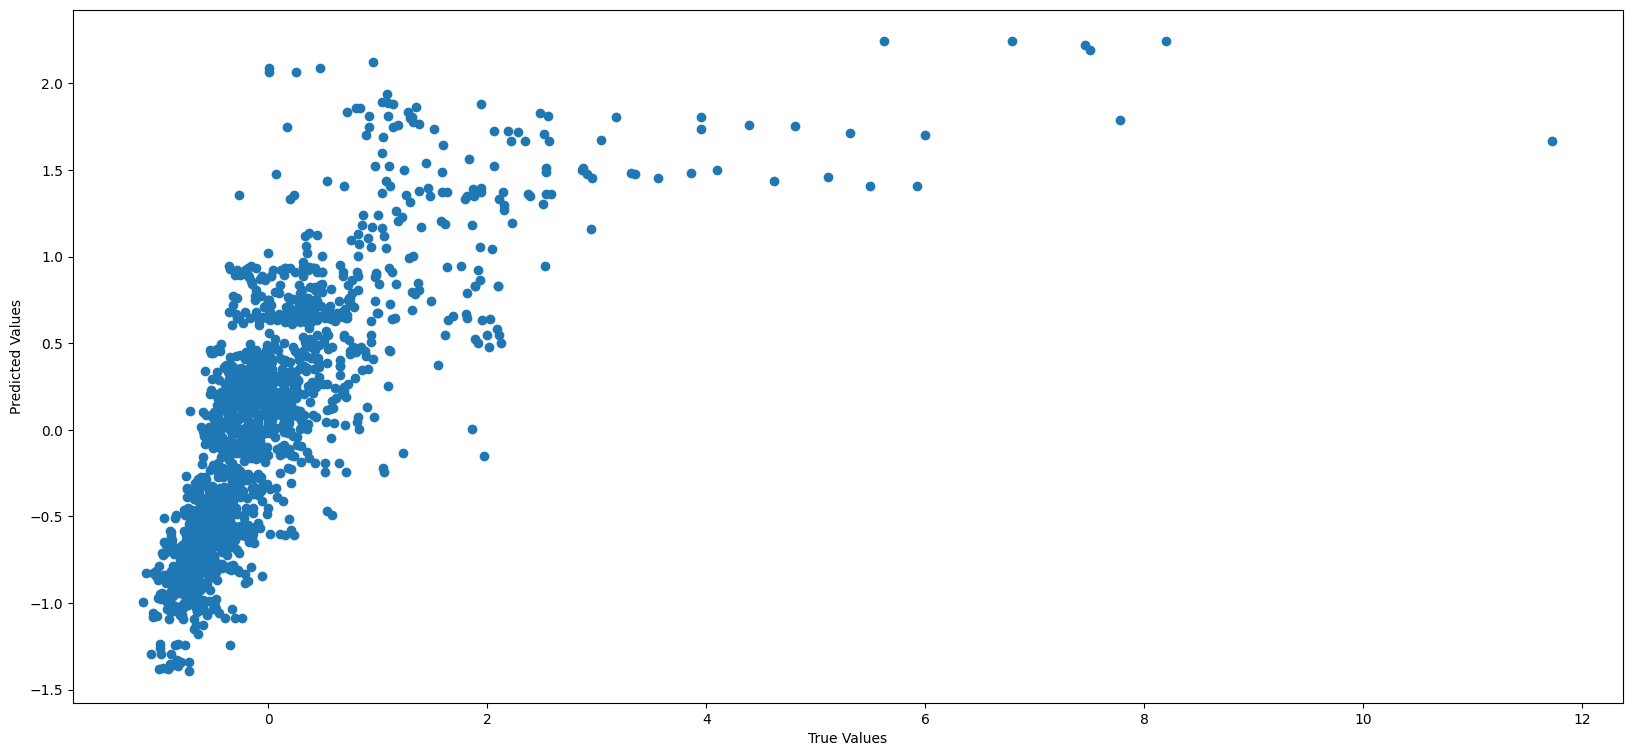

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

<Axes: ylabel='Density'>

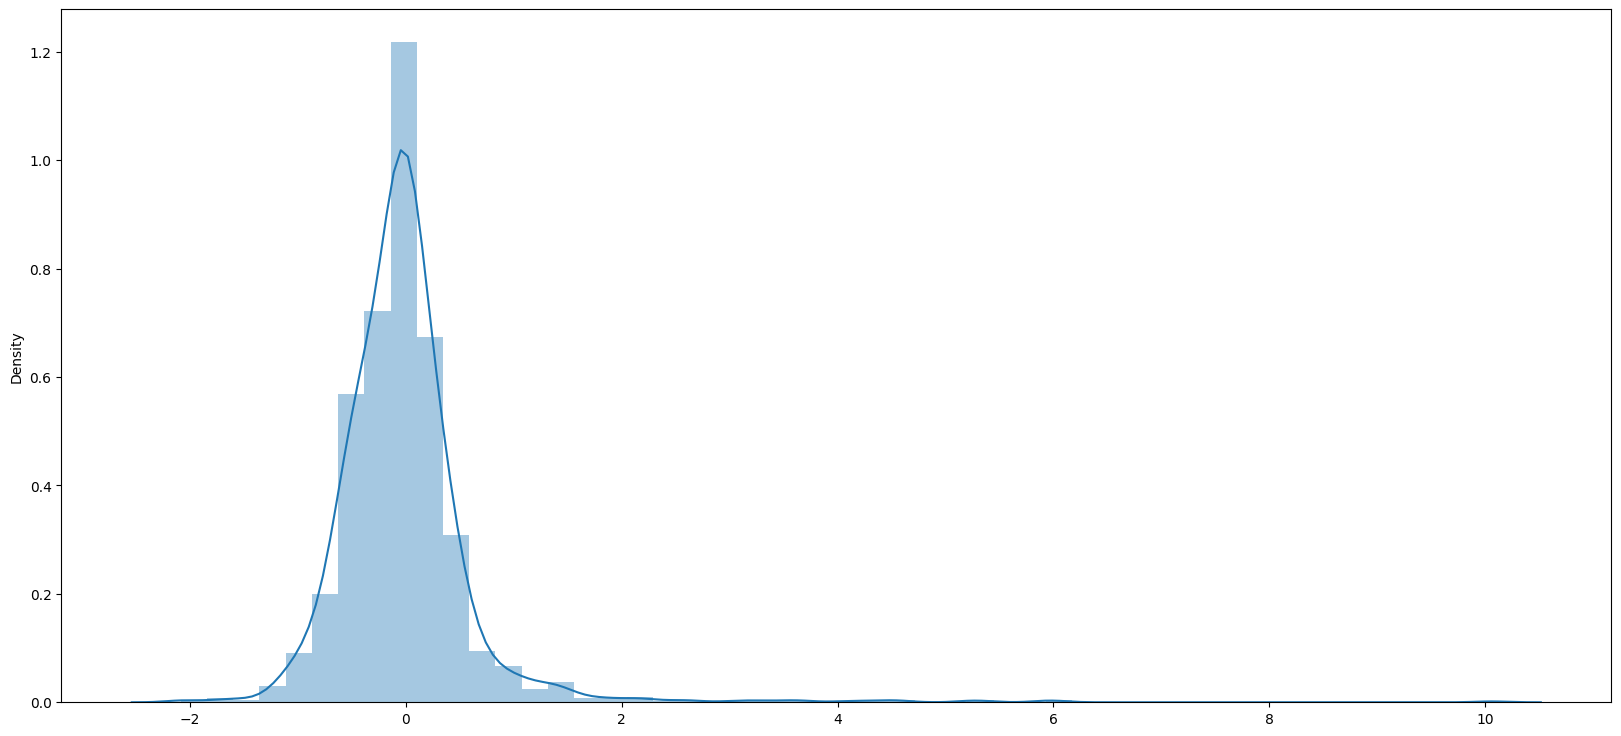

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.44679408008386284
MAE :  0.3801865982496894
RSME :  0.6684265704502349


#SUPPORT VECTOR MACHINE

In [ ]:
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

Training Accuracy : 0.7048128342833653
Testing Accuracy : 0.7573065105296755


In [ ]:
y_pred = svr_model.predict(x_test)
y_pred[0:5]

array([-0.10118959, -0.43202902,  0.1083453 ,  2.19813805, -0.19793261])

Text(0, 0.5, 'Predicted Values')

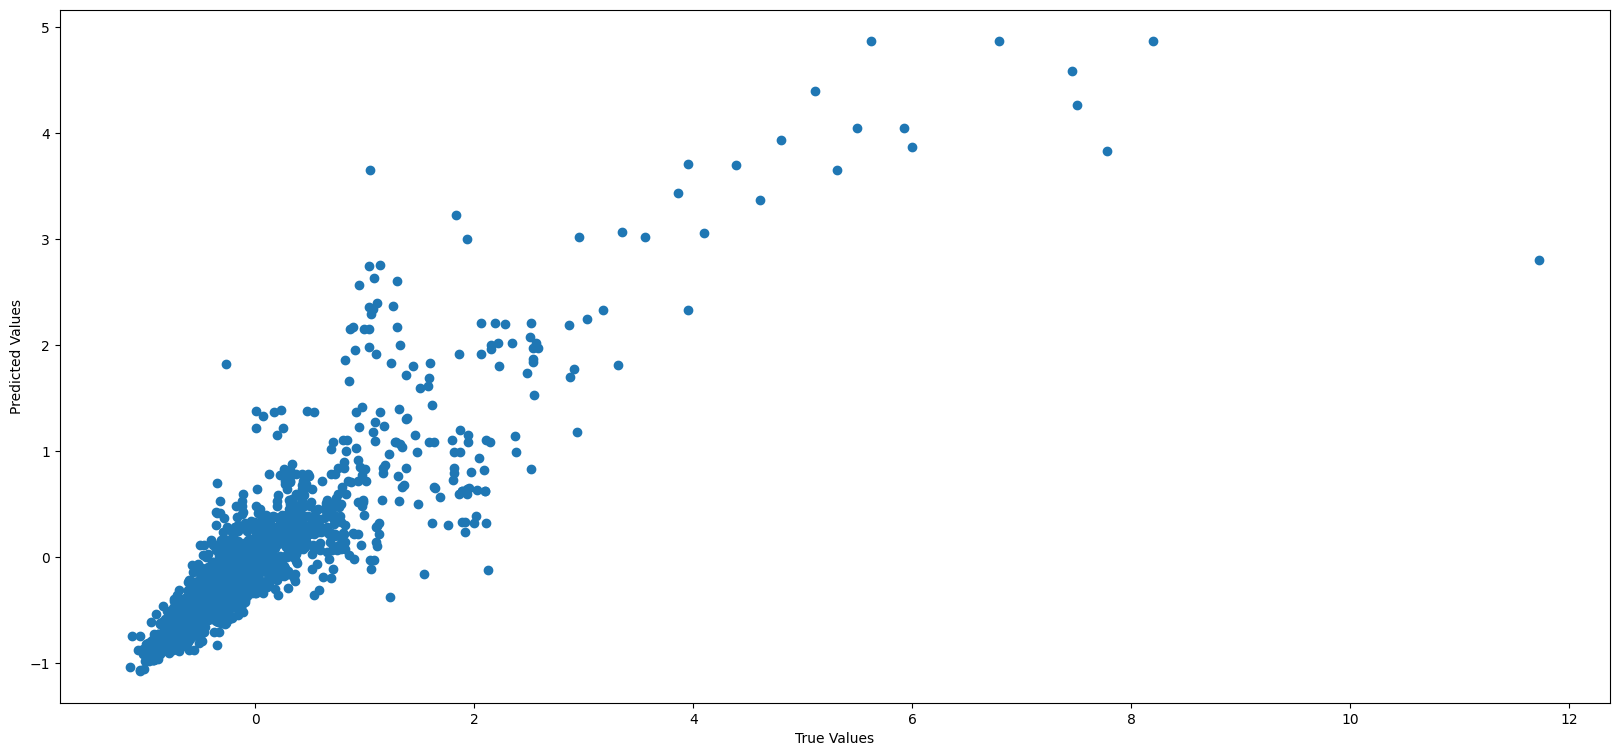

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

<Axes: ylabel='Density'>

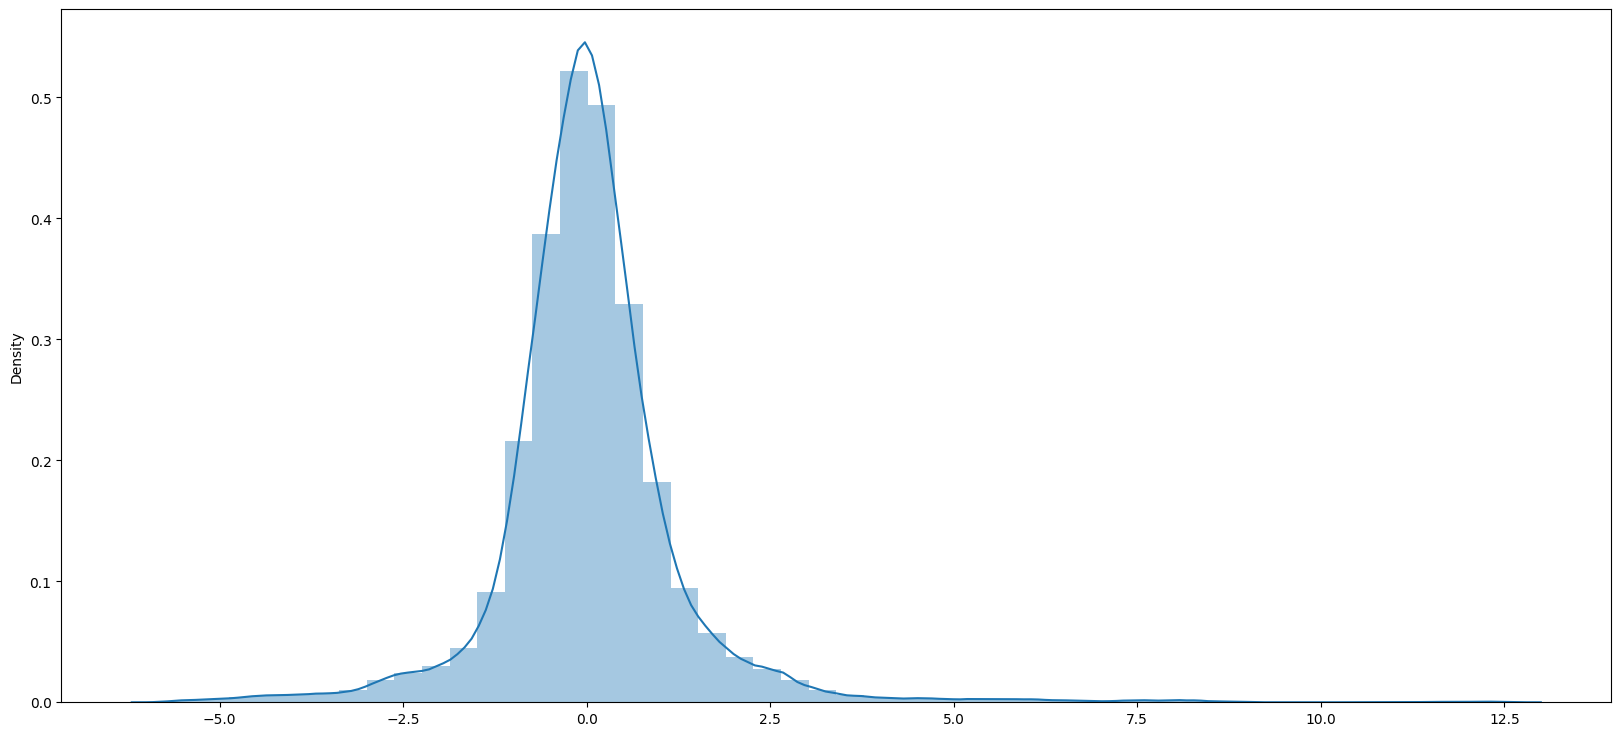

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.23083296788520832
MAE :  0.254242756771925
RSME :  0.480450796528852


#RANDOM FOREST

In [ ]:
rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

Training Accuracy : 0.9687400443725176
Testing Accuracy : 0.9296008576802035


<Axes: xlabel='True Values', ylabel='Predicted Values'>

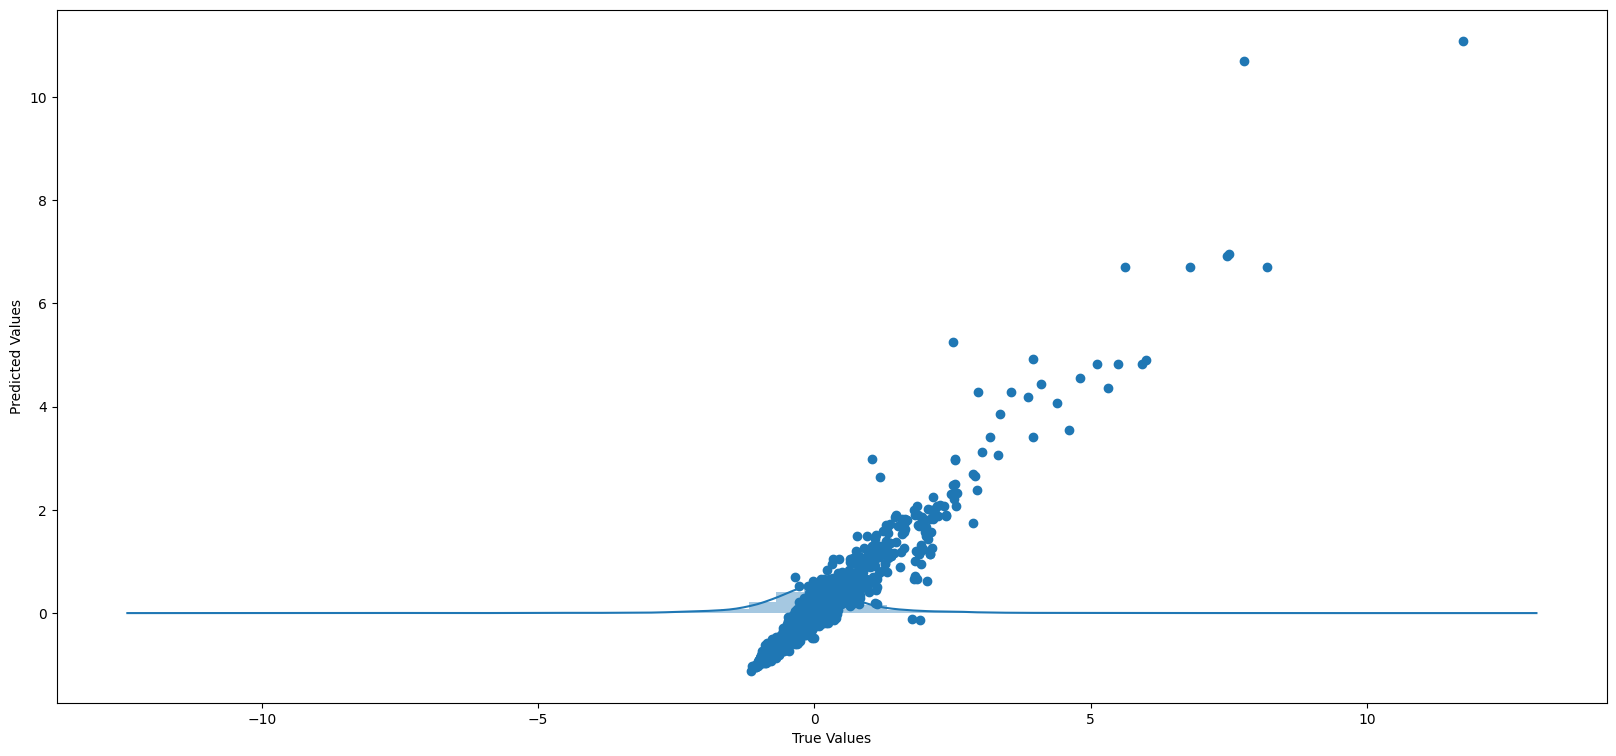

In [ ]:
y_pred = rfc_model.predict(x_test)
y_pred[0:5]
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.06695870990902218
MAE :  0.15503140593995618
RSME :  0.2587638110498108


Among the models, Random Forest gave the highest accuracy. so, it can be considered as the best algorithm to predict the car price.